In [2]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [42]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
concat = False #change as needed
if concat:
    df = df.rename(columns={'CensusTract':'TractId'})
    newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})
    df = pd.concat([newdf, df])
df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


In [54]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [IncomePerCap]')
  plt.legend()
  plt.grid(True)

In [55]:
df = df.dropna()
df = df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'IncomePerCap',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']]
train_dataset = df.sample(frac=0.9, random_state=0)
test_dataset = df.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('IncomePerCap')
test_labels = test_features.pop('IncomePerCap')

df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,...,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork
0,1948,940,1008,0.9,87.4,7.7,0.3,0.6,0.0,1503,...,0.0,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0
1,2156,1059,1097,0.8,40.4,53.3,0.0,2.3,0.0,1662,...,0.0,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0
2,2968,1364,1604,0.0,74.5,18.6,0.5,1.4,0.3,2335,...,0.0,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0
3,4423,2172,2251,10.5,82.8,3.7,1.6,0.0,0.0,3306,...,0.0,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0
4,10763,4922,5841,0.7,68.5,24.8,0.0,3.8,0.0,7666,...,0.0,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0


In [56]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.asarray(train_features).astype('float32'))

In [57]:
ann_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=28, activation='relu'),
    # tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

Epoch 1/150
1179/1179 - 2s - loss: 84877152.0000 - val_loss: 49181160.0000 - 2s/epoch - 2ms/step
Epoch 2/150
1179/1179 - 2s - loss: 48464168.0000 - val_loss: 47675244.0000 - 2s/epoch - 1ms/step
Epoch 3/150
1179/1179 - 1s - loss: 46808924.0000 - val_loss: 46339784.0000 - 1s/epoch - 1ms/step
Epoch 4/150
1179/1179 - 1s - loss: 44971824.0000 - val_loss: 46122924.0000 - 1s/epoch - 1ms/step
Epoch 5/150
1179/1179 - 1s - loss: 43357808.0000 - val_loss: 43374892.0000 - 1s/epoch - 1ms/step
Epoch 6/150
1179/1179 - 2s - loss: 42697108.0000 - val_loss: 42982836.0000 - 2s/epoch - 1ms/step
Epoch 7/150
1179/1179 - 2s - loss: 41255408.0000 - val_loss: 40314020.0000 - 2s/epoch - 1ms/step
Epoch 8/150
1179/1179 - 2s - loss: 40205992.0000 - val_loss: 43401080.0000 - 2s/epoch - 1ms/step
Epoch 9/150
1179/1179 - 2s - loss: 39711728.0000 - val_loss: 38995908.0000 - 2s/epoch - 1ms/step
Epoch 10/150
1179/1179 - 2s - loss: 39363852.0000 - val_loss: 41034940.0000 - 2s/epoch - 1ms/step
Epoch 11/150
1179/1179 - 2s -

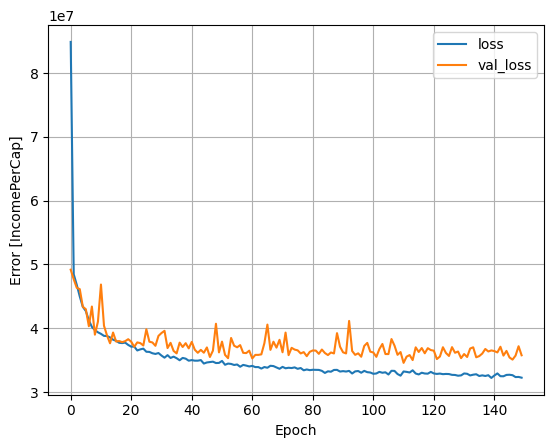

In [58]:
ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
    )

history = ann_model.fit(
    train_features,
    train_labels,
    epochs=150,
    batch_size=50,
    validation_split=0.1,
    verbose=2
)
plot_loss(history)

RESULTS:

-----------------------------------------

Using just 2015 data

1 layer  : 34435316.0000 MSE

2 layers : 32542424.0000 MSE (28, 14, 1)

2 layers : 31465028.0000 MSE (28,  7, 1)

3 layers : 33440750.0000 MSE

------------------------------------------

Using 2015 + 2017 data

1 layer  : 49900776.0000 MSE

2 layers : 36901260.0000 MSE (28, 14, 1)

2 layers : 37744916.0000 MSE (28,  7, 1)

3 layers : 40632372.0000 MSE

-----------------------------------------

Now how does the best model trained on 2015 data perform on the 2017 data?

In [59]:
newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})

In [60]:
def mse(y, y_prime, ignore_size_mismatch=False):
    if (len(y) != len(y_prime)) and not ignore_size_mismatch:
        print(len(y), len(y_prime))
        raise ValueError("Mismatched lengths")
    sum = 0
    for i in range(min(len(y), len(y_prime))):
        sum += (y[i] - y_prime[i])*(y[i] - y_prime[i])
    return (sum/min(len(y), len(y_prime)))[0]

In [63]:
y_prime = ann_model.predict(newdf[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']].dropna())
y = newdf['IncomePerCap'].dropna().to_numpy()
# print("Y:",y,"\nY':", y_prime)
# print(y.shape, y_prime.shape)
mse(y, y_prime, ignore_size_mismatch=True)

2283/2283 [==============================] - 2s 944us/step


388747953.4701566

Decent! But still significantly worse than on the original dataset.

So where is the error the highest when using the old data to predict the new? Why?

In [77]:
from queue import PriorityQueue

def get_n_highest_error(df, model, n):
   y_prime = model.predict(df[['TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork']].dropna())
   y = df['IncomePerCap'].dropna().to_numpy()
   error_q = PriorityQueue()
   for i in range(min(len(y), len(y_prime))):
      error = (y[i] - y_prime[i])*(y[i] - y_prime[i])
      error_q.put((error, i))
   max_error_rows = []
   for _ in range(n):
      max_error_rows.append(df.iloc[error_q.get()[1]])
   return pd.DataFrame(max_error_rows)


In [110]:
max_error_df = get_n_highest_error(df=newdf, model=ann_model, n=len(newdf)//4) #look at the top quarter most poorly predicted values
# print(max_error_df.head(10))
max_error_df_desc = max_error_df.describe()
newdf_desc = newdf.describe()
df_desc = df.describe()

2283/2283 [==============================] - 2s 988us/step


But first, how does the 2017 data differ from the 2015 data?

In [111]:
df_minus_newdf = 100*(df_desc - newdf_desc)/(df_desc)
print("Percent change in value from 2015 to 2017")
df_minus_newdf.iloc[1]

Percent change in value from 2015 to 2017


Asian             -3.574975
Black             -0.374849
Carpool            3.414935
ChildPoverty            NaN
Citizen           -0.728458
Construction       0.785187
Drive              0.017708
Employed          -1.677136
FamilyWork        -0.622012
Hispanic          -2.330014
Income                  NaN
IncomeErr               NaN
IncomePerCap      -7.471870
IncomePerCapErr         NaN
MeanCommute       -1.426809
Men               -0.178896
Native            -1.533357
Office             2.083557
OtherTransp       -0.756946
Pacific           -2.487061
Poverty                 NaN
PrivateWork       -0.617113
Production        -0.112546
Professional      -2.183607
PublicWork         2.990662
SelfEmployed       0.838041
Service            1.061951
TotalPop          -0.026505
TractId                 NaN
Transit            0.836002
Unemployment            NaN
Walk              -1.152718
White              1.216423
Women              0.120703
WorkAtHome        -7.845344
Name: mean, dtype: f

Answer: They don't seem to differ too much - the largest differences are income per capita and the percentage of people working at home.

Now, let's see how the rows our 2015 model struggled with differ from the rest of the 2017 dataset.

In [112]:
error_minus_newdf = 100*(max_error_df_desc - newdf_desc)/(max_error_df_desc)
error_minus_newdf.iloc[1]

TractId            -5.831585
TotalPop            0.162692
Men                 0.190881
Women               0.135366
Hispanic          -12.128228
White               2.241297
Black               4.290536
Native             19.107098
Asian              -7.614076
Pacific             8.018000
Citizen             0.377157
Income             -1.856342
IncomeErr          -2.474366
IncomePerCap       -2.146145
IncomePerCapErr    -2.682487
Poverty             0.041646
ChildPoverty        0.843224
Professional       -1.811162
Service            -0.770591
Office             -0.174143
Construction        1.734192
Production          4.825607
Drive               1.030517
Carpool             1.151706
Transit           -12.893101
Walk               -4.635379
OtherTransp        -2.820856
WorkAtHome         -2.052781
MeanCommute        -1.312128
Employed           -0.133261
PrivateWork         0.120438
PublicWork         -0.073421
SelfEmployed       -1.494306
FamilyWork          2.991669
Unemployment  

In [124]:
state_df = max_error_df.groupby('State').count()['TractId']/newdf.groupby('State').count()['TractId']
print(state_df.sort_values(ascending=False).head(10))

State
Alabama         0.804403
Wyoming         0.439394
South Dakota    0.418919
Arizona         0.395151
Alaska          0.383234
Mississippi     0.376506
Arkansas        0.360058
Wisconsin       0.344216
Hawaii          0.319088
Iowa            0.310303
Name: TractId, dtype: float64


In [127]:
df = pd.read_csv('archive/acs2015_census_tract_data.csv')
newdf = pd.read_csv('archive/acs2017_census_tract_data.csv').rename(columns={'VotingAgeCitizen':'Citizen'})

alabama_2015 = df[df['State']=='Alabama']
alabama_2017 = newdf[newdf['State']=='Alabama']

print(alabama_2017.describe()-alabama_2015.describe())

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Citizen', 'IncomePerCap', 'Professional',
       'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool',
       'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute',
       'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork'],
      dtype='object')


KeyError: 'State'